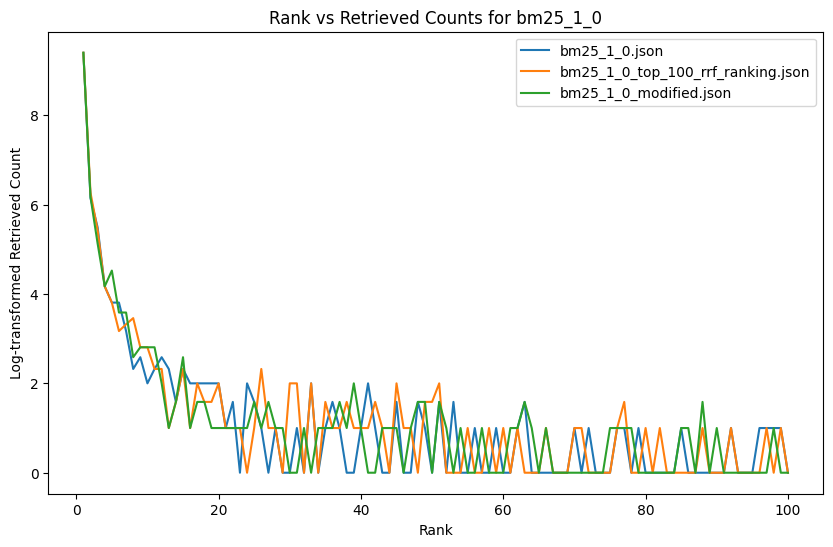

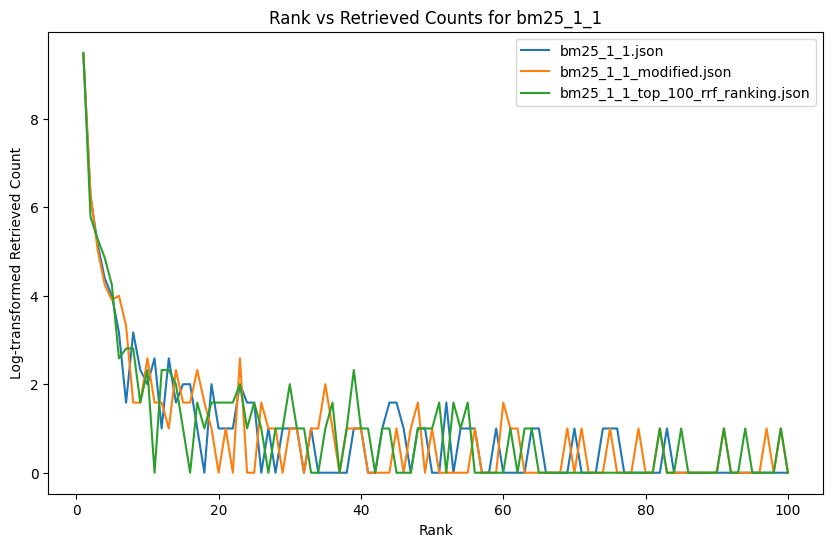

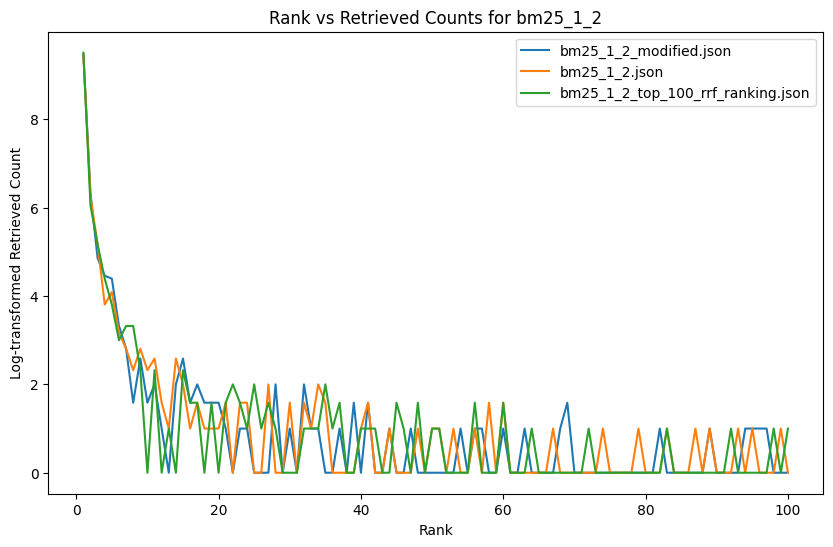

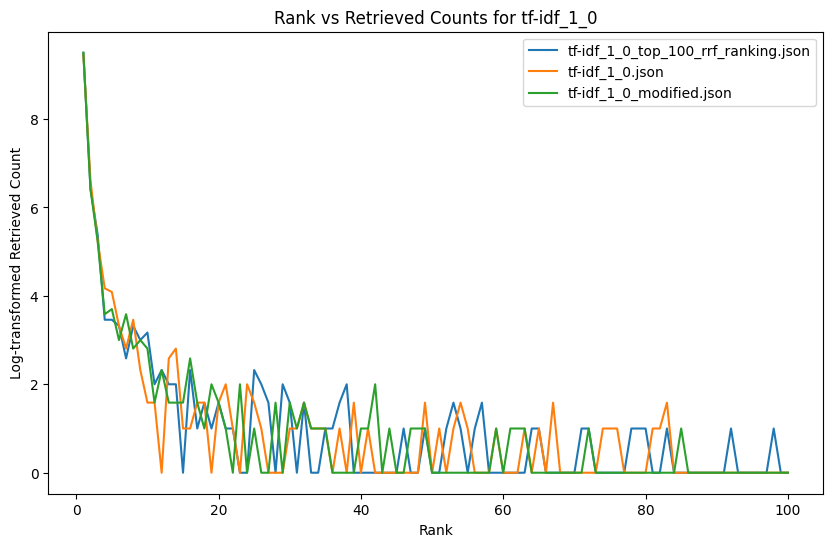

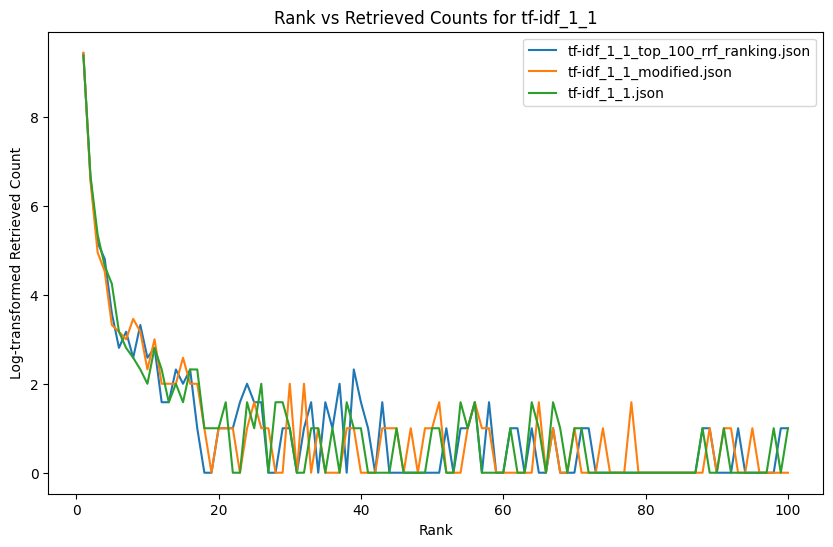

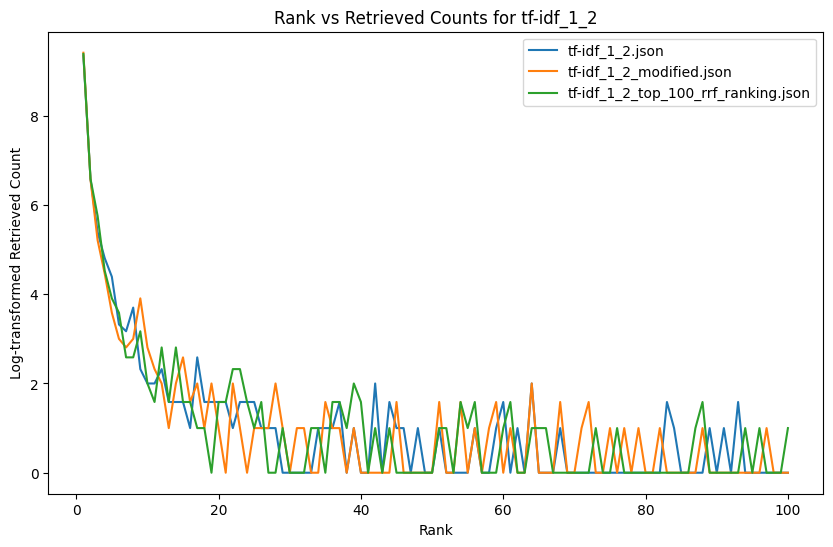

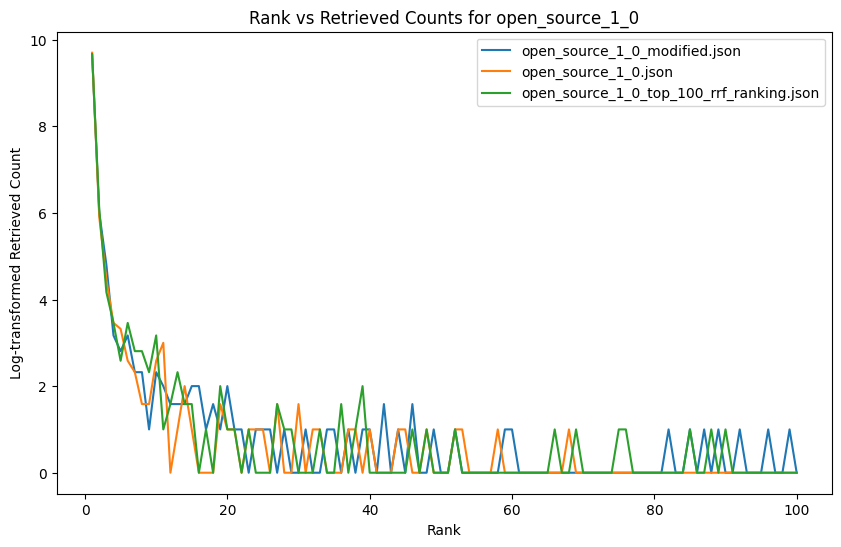

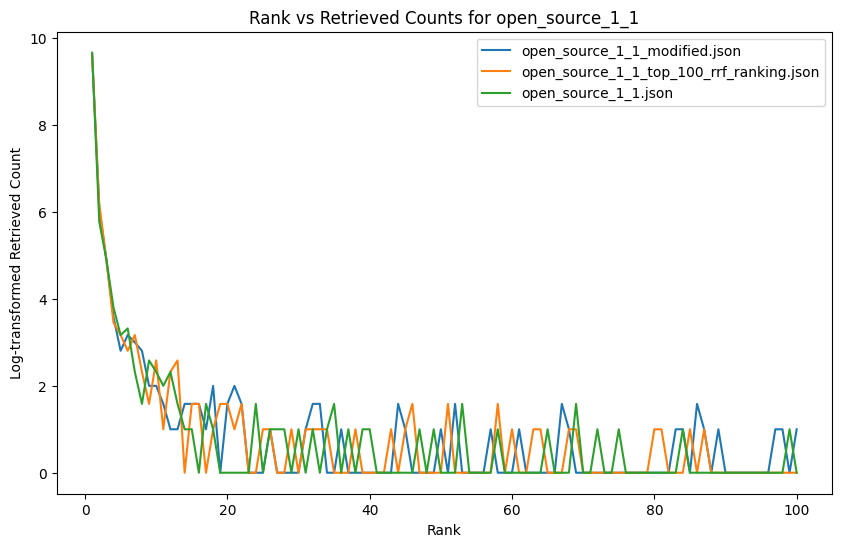

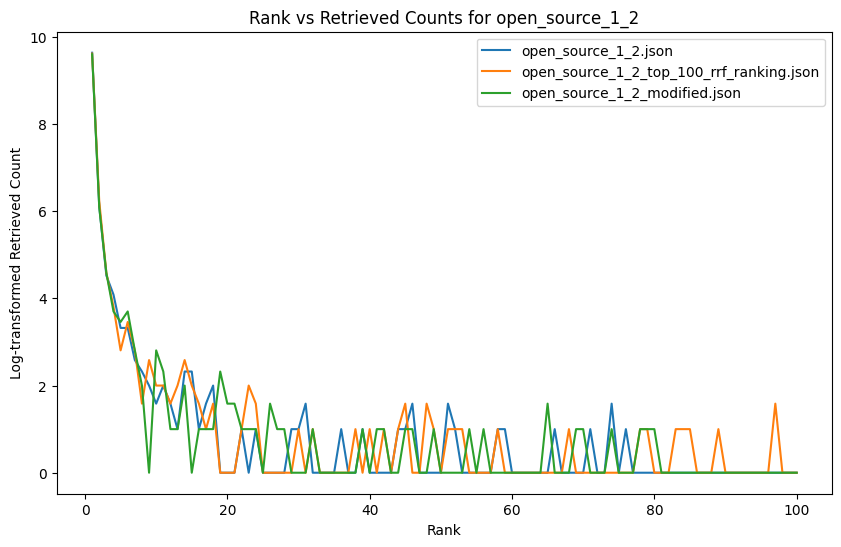

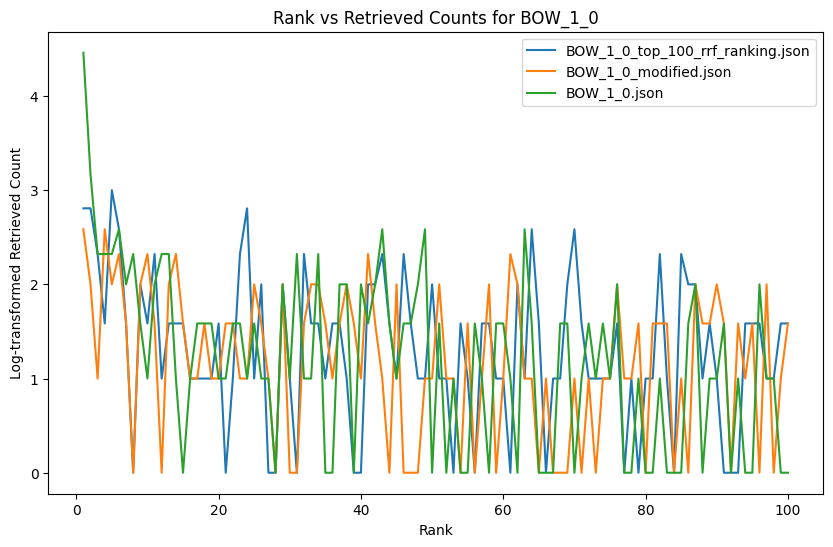

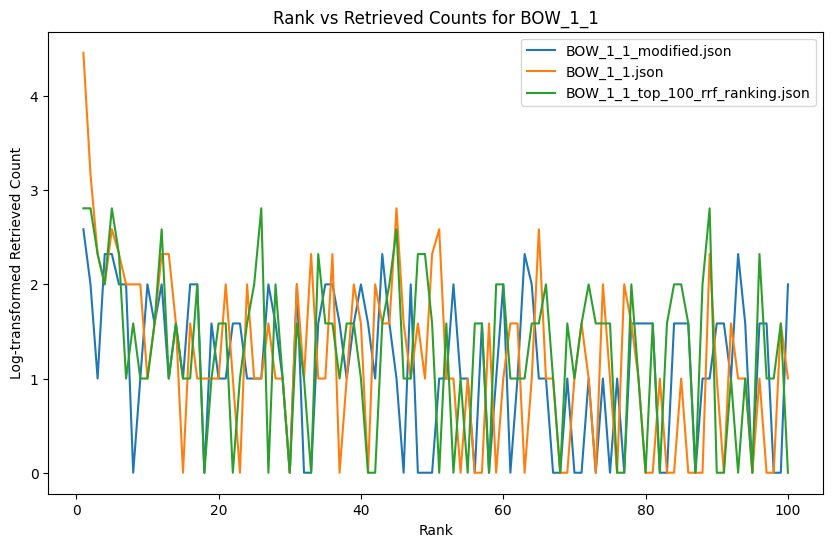

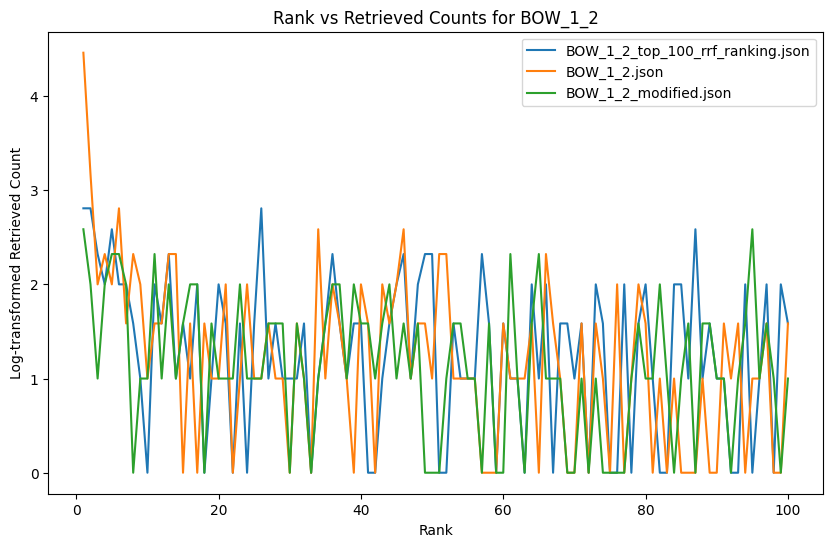

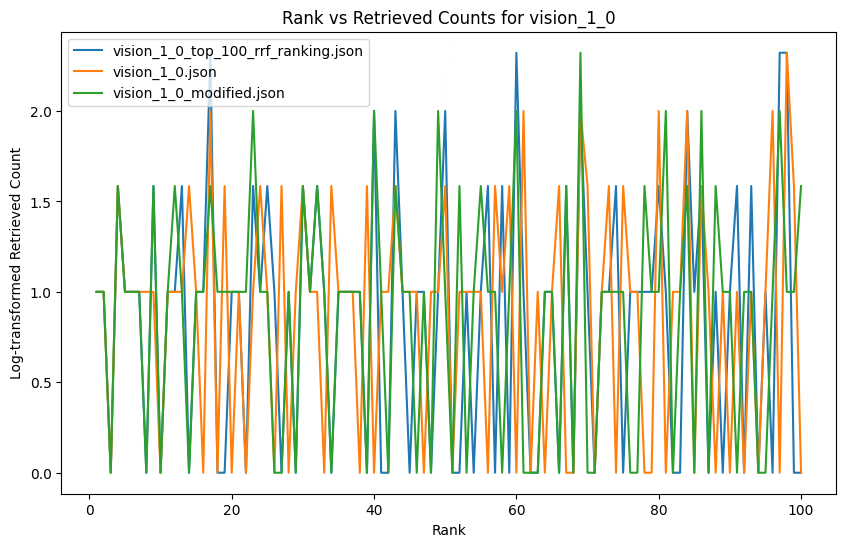

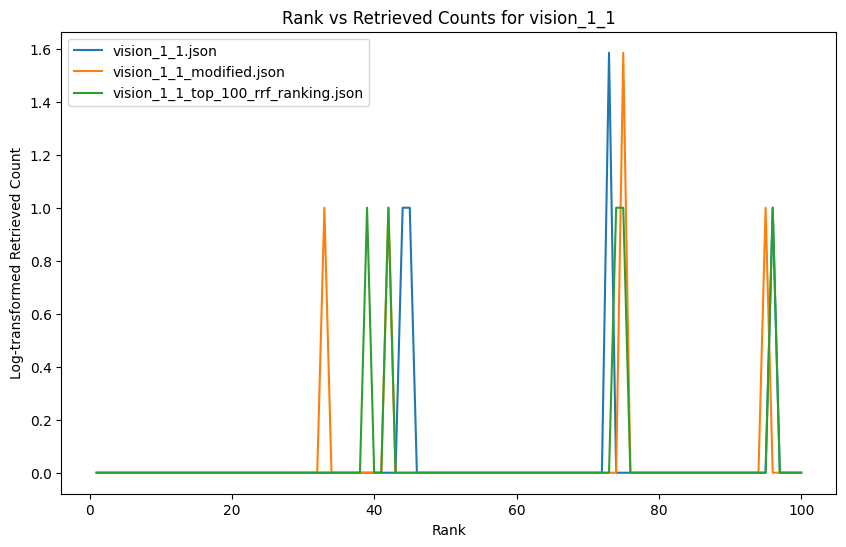

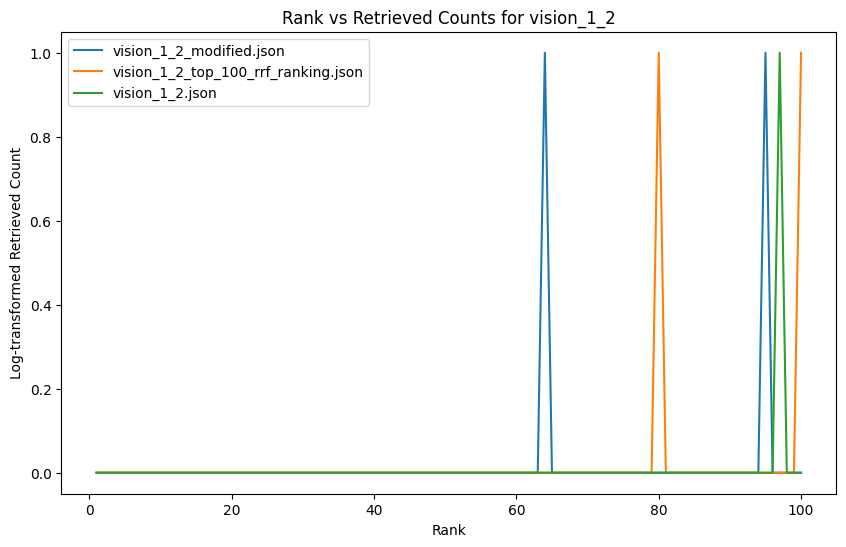

In [5]:
import os
import json
import math
import matplotlib.pyplot as plt

# List of names to iterate over
names = ["bm25_1_0", "bm25_1_1", "bm25_1_2", 
         "tf-idf_1_0", "tf-idf_1_1", "tf-idf_1_2", 
         "open_source_1_0", "open_source_1_1", 
         "open_source_1_2", "BOW_1_0", "BOW_1_1", 
         "BOW_1_2", "vision_1_0", "vision_1_1", 
         "vision_1_2"]

# Initialize x-axis (rank) values, assuming it's 1-100
x = list(range(1, 101))

# Loop through each prefix name to create a separate plot for each
for name in names:
    counts = []  # This will store the counts for each file with the current prefix
    
    # List files starting with the current name (prefix)
    files = [f for f in os.listdir() if f.startswith(name)]
    
    # Process each file that starts with the current prefix
    for file in files:
        with open(file, "r") as f:
            data = json.load(f)
            counts_file = [0 for _ in range(101)]
            
            # Count the occurrences for each rank
            for element in data:
                counts_file[element["rank"]] += 1
            
            # Apply log transformation (log(count + 1))
            counts_file = counts_file[1:]  # Remove the first element (rank 0)
            for i in range(len(counts_file)):
                counts_file[i] = math.log(counts_file[i] + 1, 2)
            
            # Append the counts for the current file
            counts.append((file, counts_file))  # Save file name along with its counts
    
    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))
    
    # Plot each file with the current prefix
    for file, count in counts:
        plt.plot(x, count, label=file)  # Use the filename as the legend label
    
    # Add labels and title
    plt.xlabel('Rank')
    plt.ylabel('Log-transformed Retrieved Count')
    plt.title(f'Rank vs Retrieved Counts for {name}')
    
    # Add legend
    plt.legend()
    
    # Show the plot for the current prefix
    plt.show()

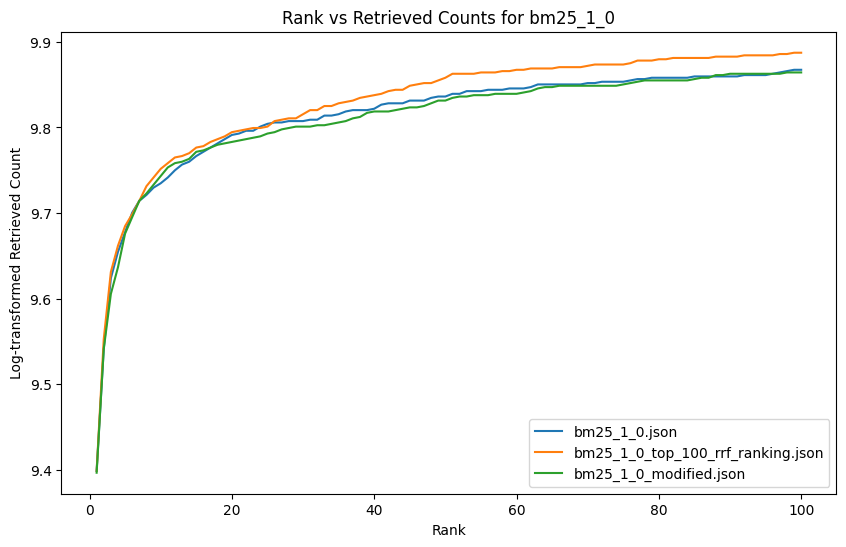

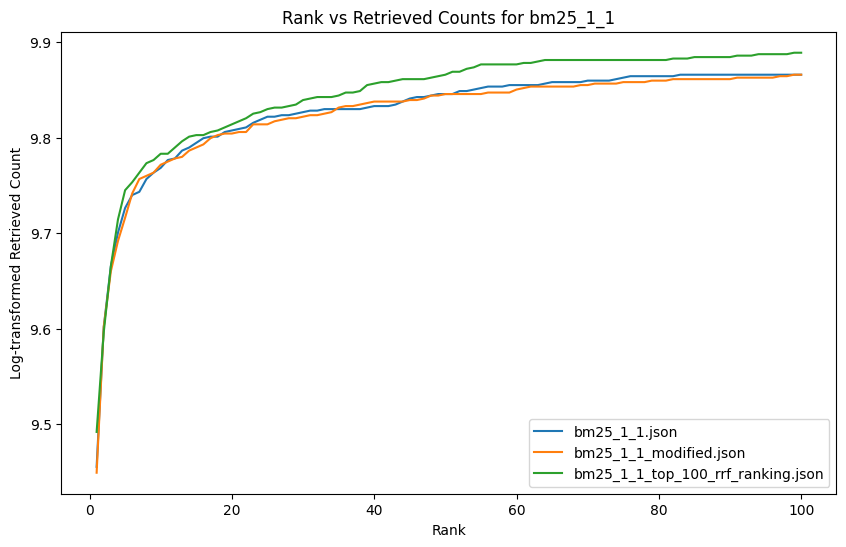

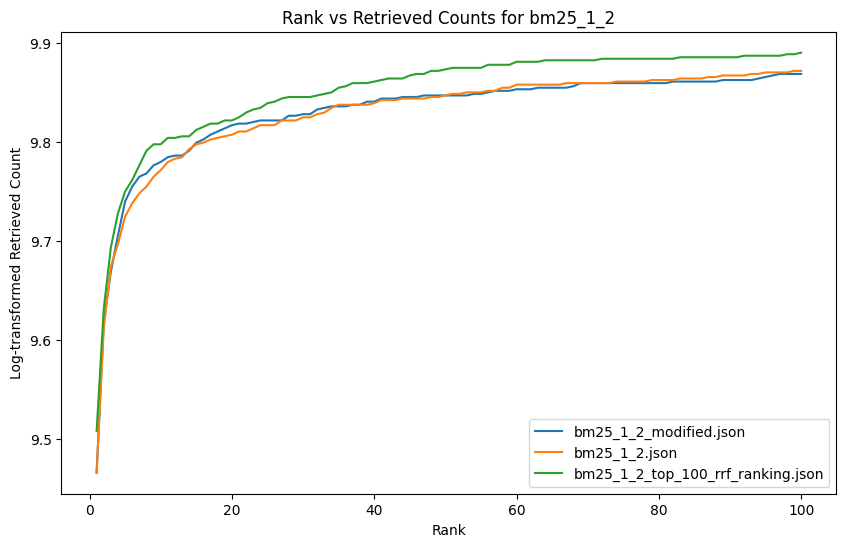

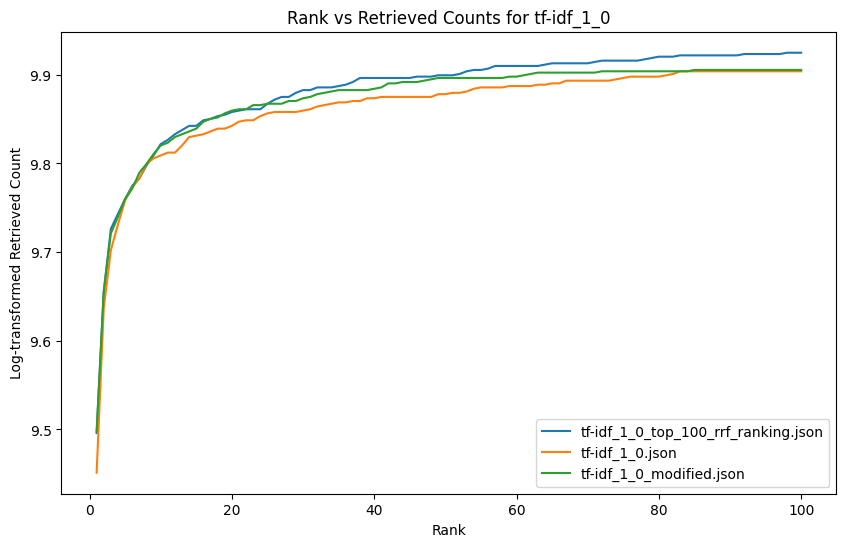

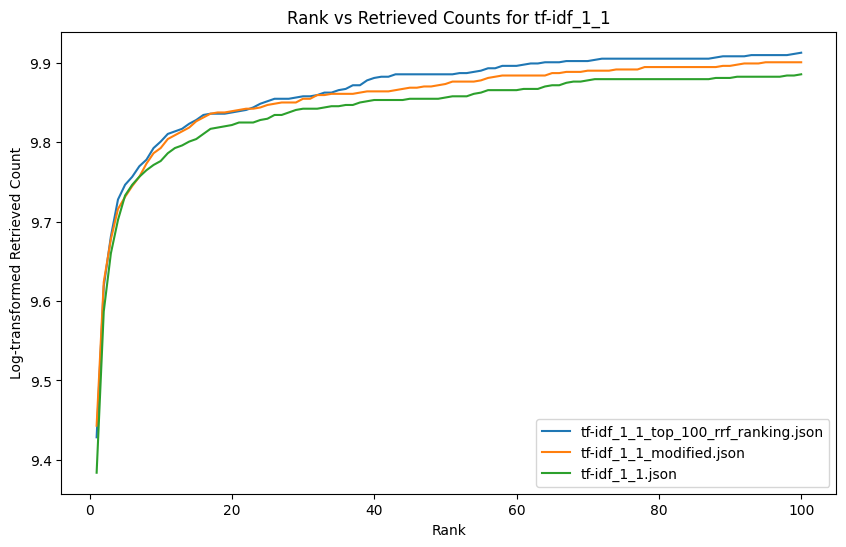

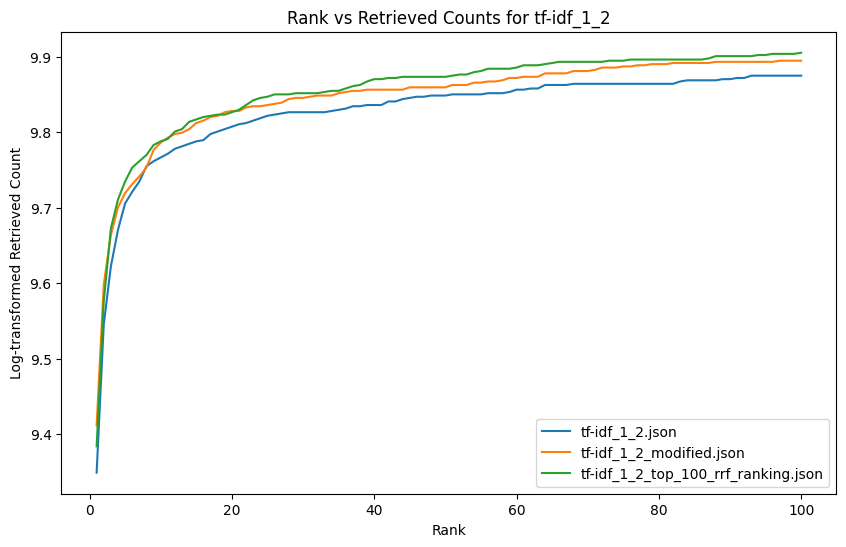

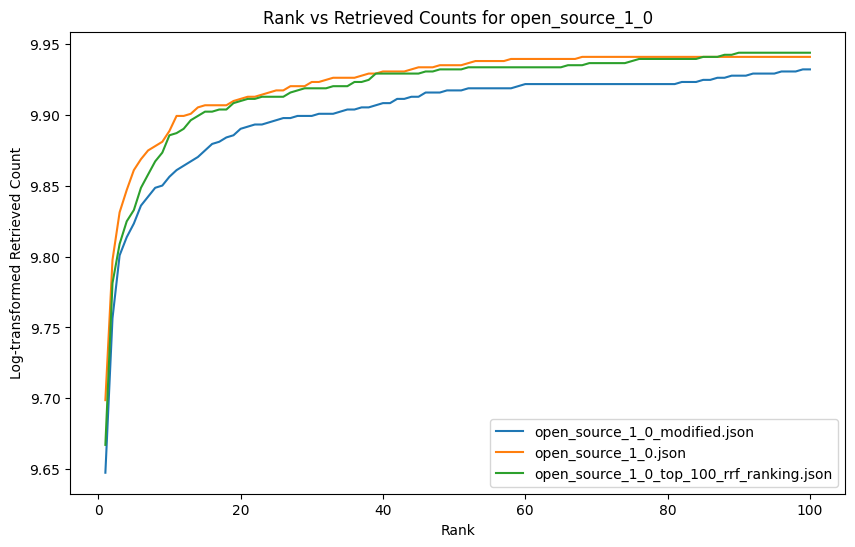

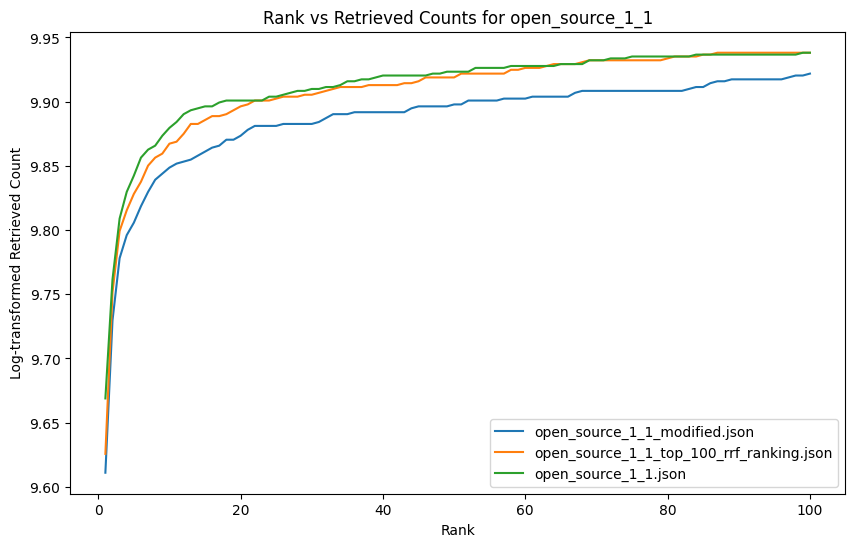

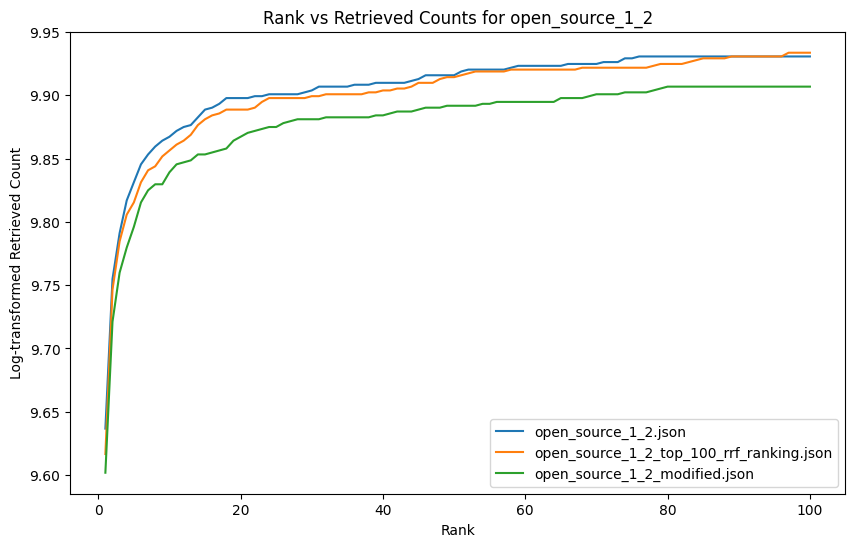

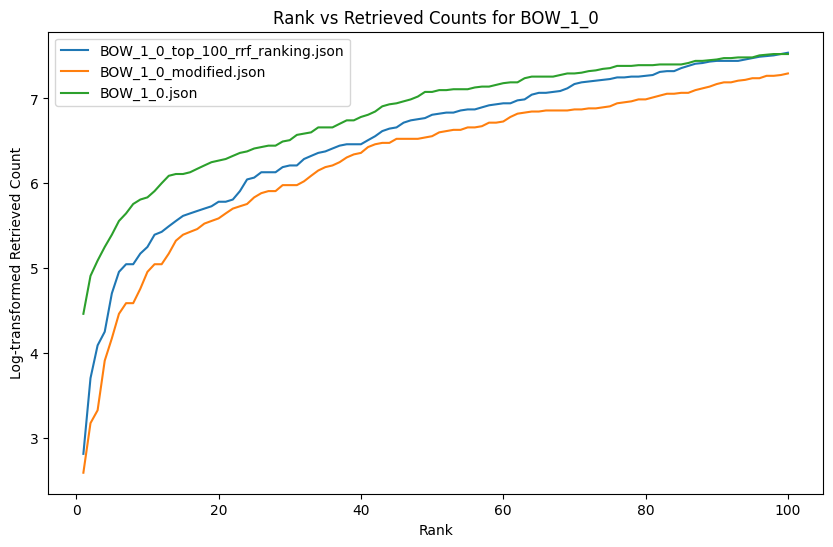

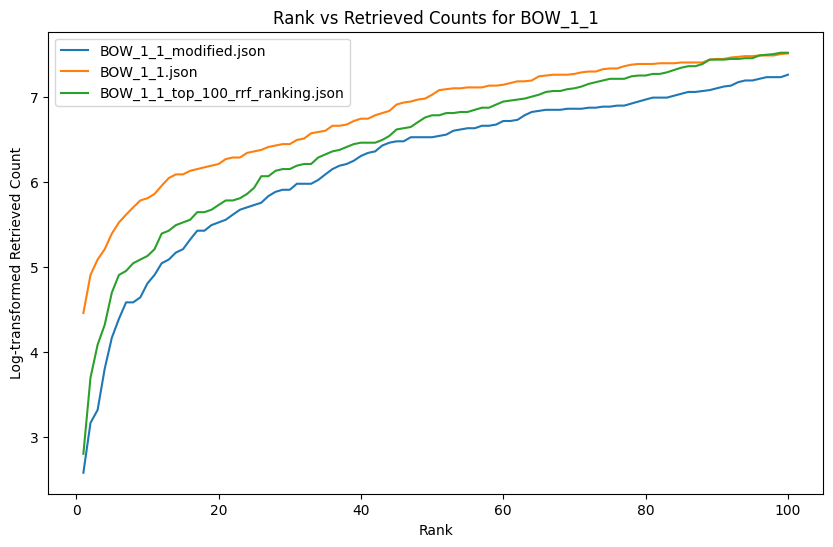

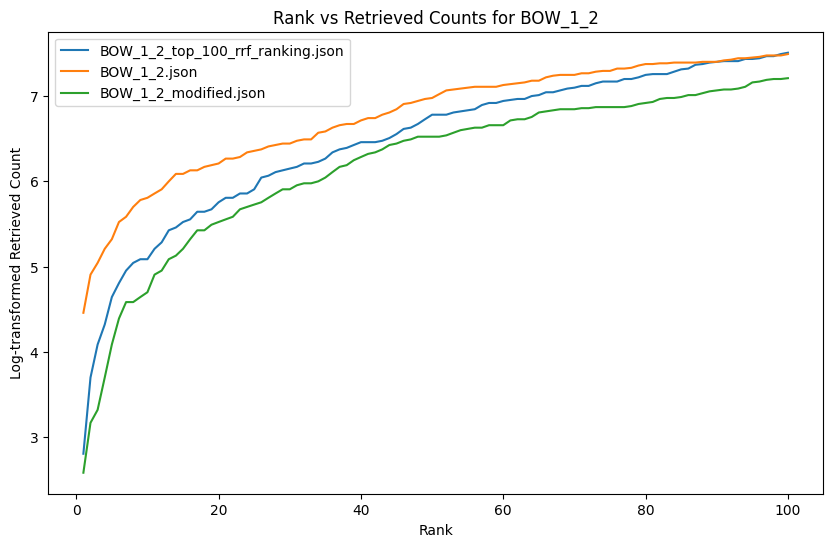

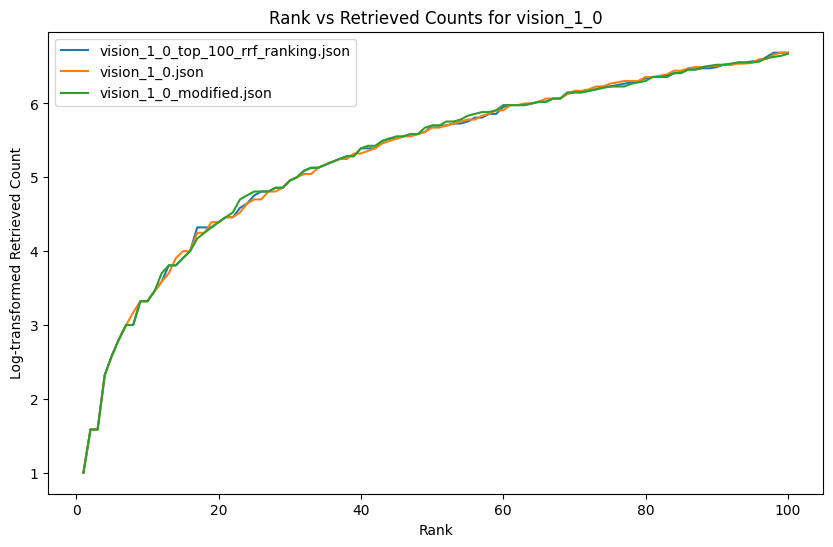

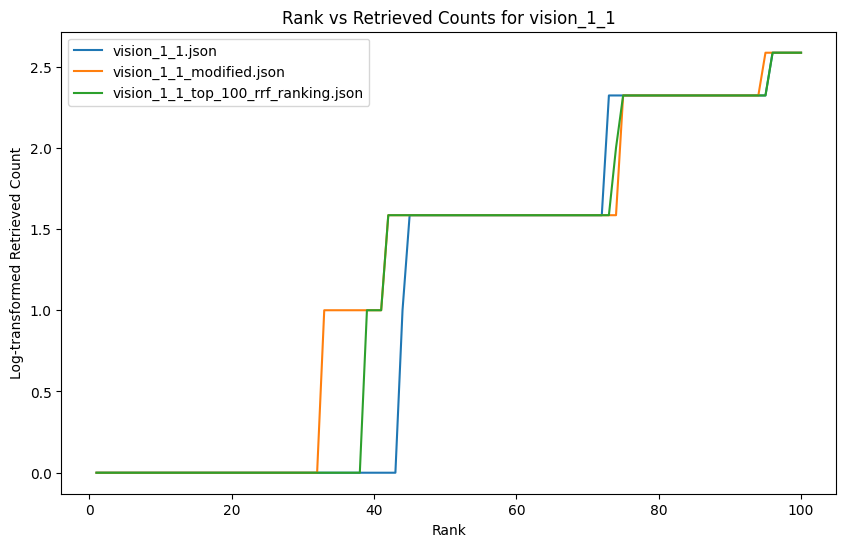

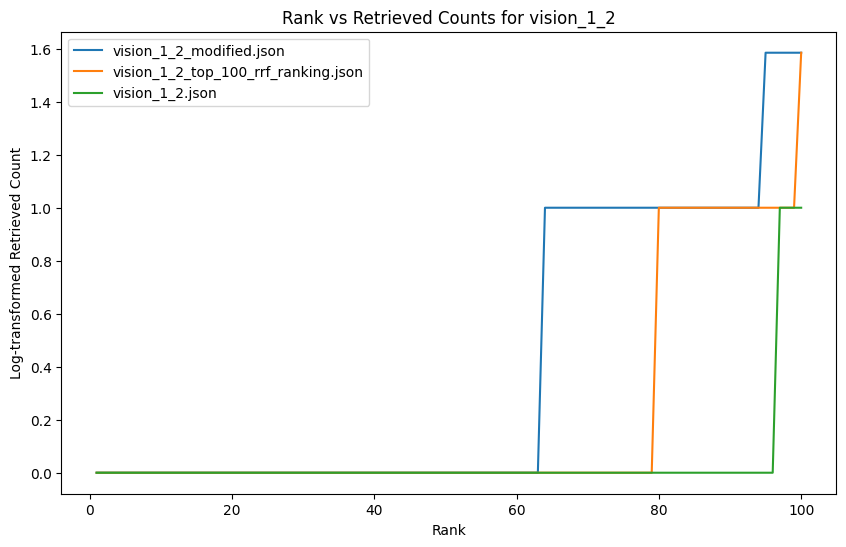

In [6]:

# Initialize x-axis (rank) values, assuming it's 1-100
x = list(range(1, 101))

# Loop through each prefix name to create a separate plot for each
for name in names:
    counts = []  # This will store the counts for each file with the current prefix
    
    # List files starting with the current name (prefix)
    files = [f for f in os.listdir() if f.startswith(name)]
    
    # Process each file that starts with the current prefix
    for file in files:
        with open(file, "r") as f:
            data = json.load(f)
            counts_file = [0 for _ in range(101)]
            
            # Count the occurrences for each rank
            for element in data:
                counts_file[element["rank"]] += 1
            
            # Apply cumulative sum (adding the previous counts)
            counts_file = counts_file[1:]  # Remove the first element (rank 0)
            for i in range(1, len(counts_file)):
                counts_file[i] += counts_file[i - 1]
            
            # Apply log transformation (log(count + 1))
            for i in range(len(counts_file)):
                counts_file[i] = math.log(counts_file[i] + 1, 2)
            
            # Append the counts for the current file
            counts.append((file, counts_file))  # Save file name along with its counts
    
    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))
    
    # Plot each file with the current prefix
    for file, count in counts:
        plt.plot(x, count, label=file)  # Use the filename as the legend label
    
    # Add labels and title
    plt.xlabel('Rank')
    plt.ylabel('Log-transformed Retrieved Count')
    plt.title(f'Rank vs Retrieved Counts for {name}')
    
    # Add legend
    plt.legend()
    
    # Show the plot for the current prefix
    plt.show()
